# About The Dataset
The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset you'll use in this project was downloaded from Kaggle at [https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package?resource=download&select=weatherAUS.csv)  
Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)  

The dataset contains observations of weather metrics for each day from 2008 to 2017, and includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| :------------ | :---------------------------------------------------- | :-------------- | :----- |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged over 10 minutes prior to 9am  | Compass Points  | object |
| WindDir3pm    | Wind direction averaged over 10 minutes prior to 3pm  | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged over 10 minutes prior to 9am      | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged over 10 minutes prior to 3pm      | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was at least 1mm of rain today               | Yes/No          | object |
| RainTomorrow  | If there is at least 1mm of rain tomorrow             | Yes/No          | object |



## Install and import the required libraries


Exectue the following cells to install and import the necessary libraries.


In [93]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [94]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/_0eYOqji3unP1tDNKWZMjg/weatherAUS-2.csv"
df = pd.read_csv(url)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Sunshine and cloud cover seem like important features, but they have a lot of missing values, far too many to impute their missing values.


### Drop all rows with missing values
To try to keep things simple we'll drop rows with missing values and see what's left


In [95]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3p

## Data leakage considerations
Consider the descriptions above for the columns in the data set. Are there any practical limitations to being able to predict whether it will rain tomorrow given the available data? 

## Points to note - 1
List some of the features that would be inefficient in predicting tomorrow's rainfall. There will be a question in the quiz that follows based on this observation.


If we adjust our approach and aim to predict today’s rainfall using historical weather data up to and including yesterday, then we can legitimately utilize all of the available features. This shift would be particularly useful for practical applications, such as deciding whether you will bike to work today.

With this new target, we should update the names of the rain columns accordingly to avoid confusion.


In [96]:
df = df.rename(columns={'RainToday': 'RainYesterday',
                        'RainTomorrow': 'RainToday'})

## Location selection
You could do some research to group cities in the `Location` column by distance, which I've done for you behind the scenes.  
I found that Watsonia is only 15 km from Melbourne, and the Melbourne Airport is only 18 km from Melbourne.  
Let's group these three locations together and use only their weather data to build our localized prediction model.  
Because there might still be some slight variations in the weather patterns we'll keep `Location` as a categorical variable.


In [97]:
df = df[df.Location.isin(['Melbourne','MelbourneAirport','Watsonia',])]
df. info()

<class 'pandas.core.frame.DataFrame'>
Index: 7557 entries, 64191 to 80997
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7557 non-null   object 
 1   Location       7557 non-null   object 
 2   MinTemp        7557 non-null   float64
 3   MaxTemp        7557 non-null   float64
 4   Rainfall       7557 non-null   float64
 5   Evaporation    7557 non-null   float64
 6   Sunshine       7557 non-null   float64
 7   WindGustDir    7557 non-null   object 
 8   WindGustSpeed  7557 non-null   float64
 9   WindDir9am     7557 non-null   object 
 10  WindDir3pm     7557 non-null   object 
 11  WindSpeed9am   7557 non-null   float64
 12  WindSpeed3pm   7557 non-null   float64
 13  Humidity9am    7557 non-null   float64
 14  Humidity3pm    7557 non-null   float64
 15  Pressure9am    7557 non-null   float64
 16  Pressure3pm    7557 non-null   float64
 17  Cloud9am       7557 non-null   float64
 18  Cloud3pm

### Create a function to map dates to seasons


In [98]:
def date_to_season(date):
    month = date.month
    if (month == 12) or (month == 1) or (month == 2):
        return 'Summer'
    elif (month == 3) or (month == 4) or (month == 5):
        return 'Autumn'
    elif (month == 6) or (month == 7) or (month == 8):
        return 'Winter'
    elif (month == 9) or (month == 10) or (month == 11):
        return 'Spring'

## Exercise 1: Map the dates to seasons and drop the Date column
Complete the code:
```python
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(...)

# Apply the function to the 'Date' column
df['Season'] = df['Date'].apply(date_to_season)

df=df.drop(columns=...)
df
```


In [99]:
# Write your response.
df['Date'] = pd.to_datetime(df.Date)
df['Season'] = df.Date.apply(date_to_season)
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainYesterday', 'RainToday', 'Season'],
      dtype='object')

Define the feature and target dataframes



In [100]:
X = df.drop(columns='RainToday', axis =1)
y = df['RainToday']

## Exercise 4. What can you conclude from these counts?
- How often does it rain annualy in the Melbourne area?
- How accurate would you be if you just assumed it won't rain every day?
- Is this a balanced dataset?
- Next steps?


<Axes: >

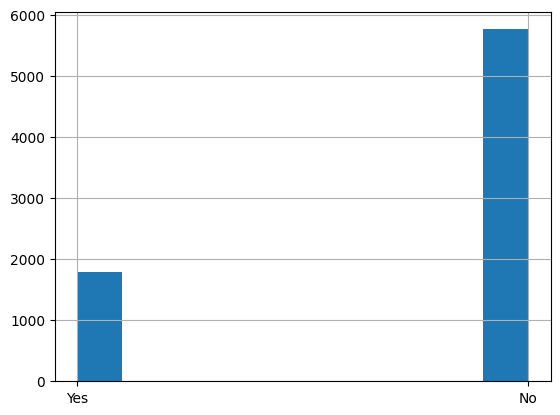

In [101]:
## Write your response here and convert the cell to a markdown.
y.value_counts()
y.hist()

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state=42)

### Define preprocessing transformers for numerical and categorical features


In [103]:
numeric_features = X_train.select_dtypes(include=['int','float']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

### Define separate transformers for both feature types and combine them into a single preprocessing transformer


In [104]:
# Scale the numeric features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# One-hot encode the categoricals 
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

### Combine the transformers into a single preprocessing column transformer



In [105]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numeric_transformer, numeric_features),
        ('cat',categorical_transformer, categorical_features)
    ]
)

###  Create a pipeline by combining the preprocessing with a Random Forest classifier



In [111]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])


### Define a parameter grid to use in a cross validation grid search model optimizer


In [114]:
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
}


### Pipeline usage in crossvalidation
Recall that the pipeline is repeatedly used within the crossvalidation by fitting on each internal training fold and predicting on its corresponding validation fold


## Perform grid search cross-validation and fit the best model to the training data
### Select a cross-validation method, ensuring target stratification during validation


In [112]:
cv = StratifiedKFold(n_splits=5, shuffle=True)

## Exercise 9. Instantiate and fit GridSearchCV to the pipeline
Complete the followng code:  
```python
grid_search = GridSearchCV(..., param_grid, cv=..., scoring='accuracy', verbose=2)  
grid_search.fit(..., ...)
```


In [115]:
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1, 
    verbose=2
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   1.1s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   1.2s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   1.3s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   1.3s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=100; total time=   1.4s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time=   2.5s
[CV] END model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=2, model__n_estimators=200; total time=   2.5s
[CV] END model__max_depth=10, model

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MinTemp',
                                                                          'MaxTemp',
                                                                          'Rainfall',
                                                                          'Evaporation',
                                                                          'Sunshine',
                                                                          'WindGustSpeed',
                                                                          'WindSpeed9am',
                                                                          'WindSpeed3pm',
                                                                          'Humidity9am',
                                                                          'Humidity3pm',
                                                                          'Pressure9am',
                                                                          'Pr...
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Location',
                                                                          'WindGustDir',
                                                                          'WindDir9am',
                                                                          'WindDir3pm',
                                                                          'RainYesterday',
                                                                          'Season'])])),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [10, 20, None],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

### Print the best parameters and best crossvalidation score


In [116]:
print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters found:  {'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best cross-validation score: 0.85


###  Display your model's estimated score


In [118]:
test_score = grid_search.score(X_test, y_test)
print("Test set score: {:.2f}".format(test_score))

Test set score: 0.86


So we have a reasonably accurate classifer, which is expected to correctly predict about 84% of the time whether it will rain today in the Melbourne area.  
But careful here. Let's take a deeper look at the results.

The best model is stored within the gridsearch object.


In [119]:
y_pred= grid_search.predict(X_test)


### Print the classification report


In [120]:
## Write your response.
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.95      0.91      1168
         Yes       0.77      0.56      0.65       344

    accuracy                           0.86      1512
   macro avg       0.82      0.75      0.78      1512
weighted avg       0.85      0.86      0.85      1512



### Plot the confusion matrix 


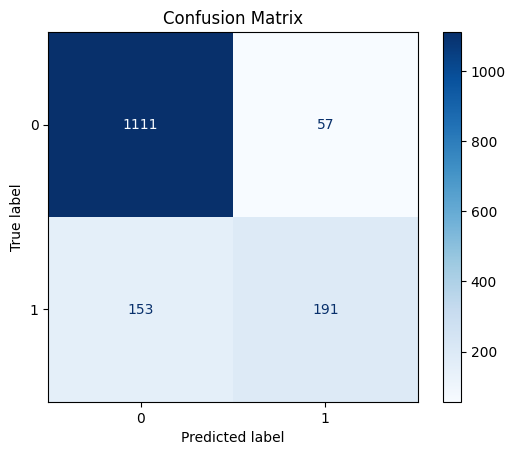

In [122]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix= conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## Feature importances
Recall that to obtain the categorical feature importances, we have to work our way backward through the modelling pipeline to associate the feature importances with their original input variables, not the one-hot encoded ones. We don't need to do this for the numeric variables because we didn't modify their names in any way.  
Remember we went from categorical features to one-hot encoded features, using the 'cat' column transformer.
 
Let's get all of the feature importances and associate them with their transformed features


## Exercise 14. Extract the feature importances
Complete the followng code:
```python
feature_importances = grid_search.best_estimator_['classifier']. ...
```


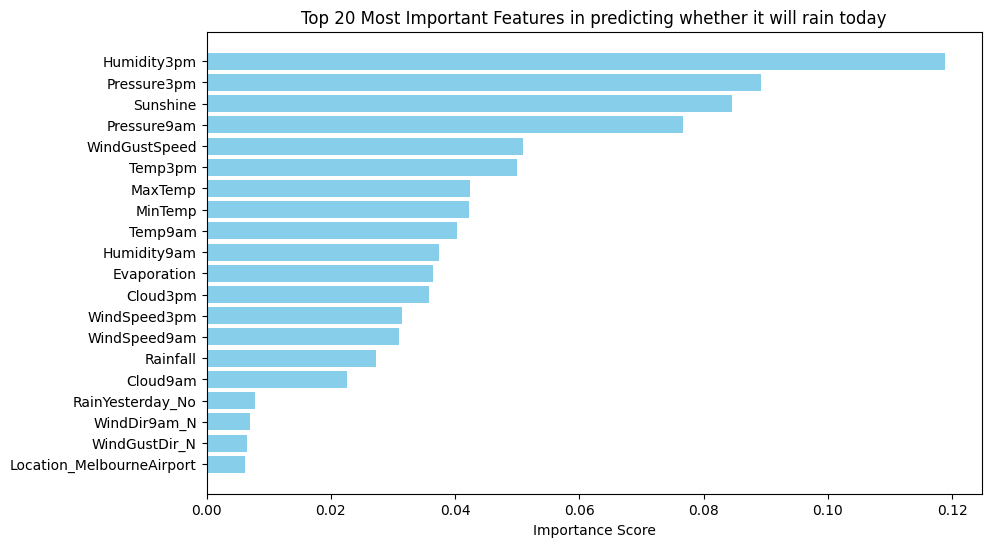

In [127]:
# Combine numeric and categorical feature names
feature_names = numeric_features + list(grid_search.best_estimator_['preprocessor']
                                        .named_transformers_['cat']
                                        .named_steps['onehot']
                                        .get_feature_names_out(categorical_features))

feature_importances = grid_search.best_estimator_['model'].feature_importances_

N = 20  # Change this number to display more or fewer features
importance_df = pd.DataFrame({'Feature': feature_names,
                              'Importance': feature_importances
                             }).sort_values(by='Importance', ascending=False)
top_features = importance_df.head(N)


# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.title(f'Top {N} Most Important Features in predicting whether it will rain today')
plt.xlabel('Importance Score')
plt.show()

### Update the pipeline and the parameter grid
Let's update the pipeline and the parameter grid and train a Logistic Regression model and compare the performance of the two models. You'll need to replace the clasifier with LogisticRegression. We have supplied the parameter grid for you.

In [128]:
from sklearn.linear_model import LogisticRegression

# Replace RandomForestClassifier with LogisticRegression
pipeline.set_params(model=LogisticRegression(random_state=42))

# update the model's estimator to use the new pipeline
grid_search.estimator = pipeline

# Define a new grid with Logistic Regression parameters
param_grid = {
    'model__solver': ['liblinear'],
    'model__penalty': ['l1', 'l2'],
    'model__class_weight': [None, 'balanced'],
    'model__C': [0.01, 0.1, 1, 10, 100]
}

grid_search.param_grid = param_grid

# Fit the updated pipeline with LogisticRegression
grid_search.fit(X_train, y_train)

# Make predictions
y_pred = grid_search.predict(X_test)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END model__C=0.01, model__class_weight=None, model__penalty=l1, model__solver=liblinear; total time=   0.1s
[CV] END model__C=0.01, model__class_weight=None, model__penalty=l1, model__solver=liblinear; total time=   0.1s
[CV] END model__C=0.01, model__class_weight=None, model__penalty=l2, model__solver=liblinear; total time=   0.1s
[CV] END model__C=0.01, model__class_weight=None, model__penalty=l1, model__solver=liblinear; total time=   0.1s
[CV] END model__C=0.01, model__class_weight=None, model__penalty=l2, model__solver=liblinear; total time=   0.1s
[CV] END model__C=0.01, model__class_weight=None, model__penalty=l1, model__solver=liblinear; total time=   0.1s
[CV] END model__C=0.01, model__class_weight=None, model__penalty=l2, model__solver=liblinear; total time=   0.1s
[CV] END model__C=0.01, model__class_weight=None, model__penalty=l1, model__solver=liblinear; total time=   0.1s
[CV] END model__C=0.01, model__cla

###  Compare the results to your previous model.
Display the clasification report and the confusion matrix for the new model and compare your results with the previous model.


              precision    recall  f1-score   support

          No       0.87      0.93      0.90      1168
         Yes       0.70      0.53      0.60       344

    accuracy                           0.84      1512
   macro avg       0.79      0.73      0.75      1512
weighted avg       0.83      0.84      0.83      1512



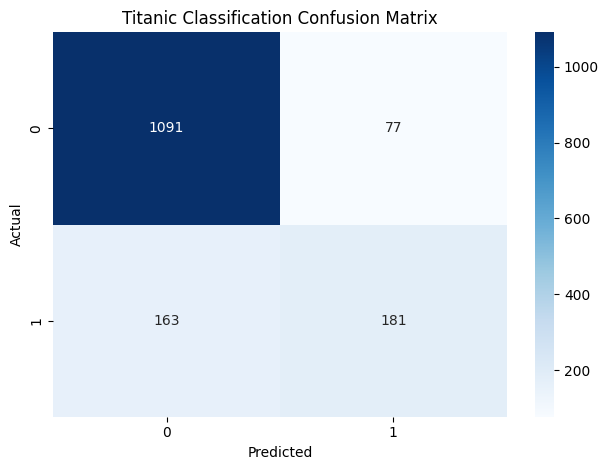

In [129]:
print(classification_report(y_test, y_pred))

# Generate the confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Titanic Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

### rainfall amount prediction

In [133]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,7557,7557.000000,7557.000000,7557.000000,7557.000000,7557.000000,7557.000000,7557.000000,7557.000000,7557.000000,7557.000000,7557.000000,7557.000000,7557.000000,7557.000000,7557.000000,7557.000000
mean,2013-01-05 11:32:27.915839488,10.471589,20.698743,1.705836,4.666905,6.431878,43.741829,16.551145,20.133651,71.933704,52.193992,1017.833360,1015.981051,5.233558,5.270081,14.141352,19.174606
min,2008-07-01 00:00:00,-2.100000,8.400000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,11.000000,6.000000,988.900000,988.200000,0.000000,0.000000,-0.600000,6.200000
25%,2010-08-28 00:00:00,7.300000,15.600000,0.000000,2.200000,3.200000,31.000000,9.000000,13.000000,62.000000,41.000000,1012.800000,1011.000000,3.000000,4.000000,10.600000,14.300000
50%,2012-11-07 00:00:00,10.100000,19.400000,0.000000,4.000000,6.600000,41.000000,13.000000,19.000000,72.000000,51.000000,1018.000000,1016.400000,7.000000,6.000000,13.700000,18.000000
75%,2015-04-09 00:00:00,13.600000,24.600000,1.000000,6.400000,9.600000,54.000000,22.000000,26.000000,84.000000,63.000000,1023.000000,1021.100000,7.000000,7.000000,17.000000,22.900000
max,2017-06-25 00:00:00,30.500000,46.800000,84.000000,23.800000,13.900000,122.000000,67.000000,76.000000,100.000000,100.000000,1039.300000,1036.000000,8.000000,8.000000,36.400000,46.100000
std,NaN,4.480357,6.525832,4.993210,3.321487,3.894928,15.606706,10.821580,9.472907,16.612418,17.635123,7.730309,7.544022,2.522287,2.342999,4.979955,6.320230
